In [1]:
import networkx as nx
import pandas as pd
import ast
# Add edges based on proximity (e.g., if clusters are within a certain distance threshold)
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [2]:
# Load your dataset
file_path = "cluster_with_pollution_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Scale down to the first 100 rows
data = data.head(100)  # Adjust the number of rows as needed

# Initialize the graph
graph = nx.Graph()

# Add nodes to the graph (one for each cluster)
for index, row in data.iterrows():
    graph.add_node(row['cluster'], 
                   species=row['speciesId'], 
                   coordinates=(row['average_lon'], row['average_lat']), 
                   AQI=row['AQI'], 
                   pollution_data=row[['CO2', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']].to_dict())

# Define a function to calculate edges between clusters
def calculate_edges(data, threshold_km=10):
    """Create edges between clusters within a distance threshold."""
    edges = []
    for i, row1 in data.iterrows():
        for j, row2 in data.iterrows():
            if i != j:  # Avoid self-loops
                coords1 = (row1['average_lat'], row1['average_lon'])
                coords2 = (row2['average_lat'], row2['average_lon'])
                distance = geodesic(coords1, coords2).km
                if distance <= threshold_km:
                    edges.append((row1['cluster'], row2['cluster'], {'distance': distance}))
    return edges

# Calculate and add edges
edges = calculate_edges(data)
graph.add_edges_from(edges)

# Find articulation points
articulation_points = list(nx.articulation_points(graph))
print("Articulation Points:", articulation_points)

# Find bridges
bridges = list(nx.bridges(graph))
print("Bridges:", bridges)

# Save results back to a DataFrame
articulation_df = pd.DataFrame({'articulation_points': articulation_points})
bridge_df = pd.DataFrame({'bridges': [str(b) for b in bridges]})

# Save articulation points and bridges to CSV files
articulation_df.to_csv('articulation_points.csv', index=False)
bridge_df.to_csv('bridges.csv', index=False)

print("Articulation points and bridges saved to CSV files.")

Articulation Points: [43]
Bridges: [(2, 17), (21, 42), (24, 80), (29, 44), (30, 70), (33, 37), (35, 43), (43, 60), (71, 78), (73, 92)]
Articulation points and bridges saved to CSV files.


Articulation Points: [43]
Bridges: [(2, 17), (21, 42), (29, 44), (33, 37), (35, 43), (43, 60)]
Articulation points and bridges saved to CSV files.


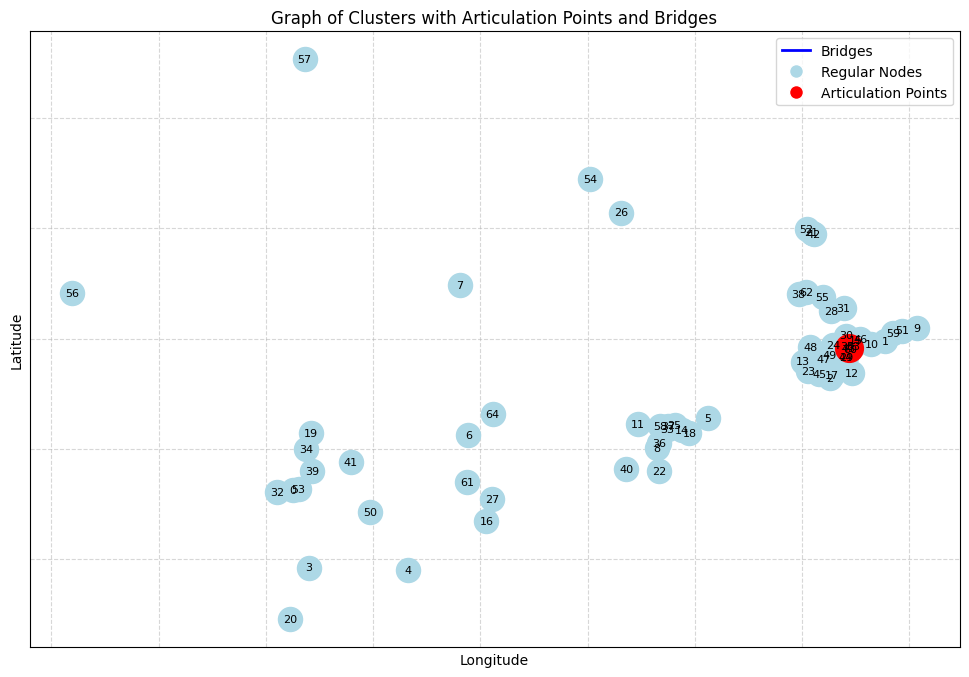

In [29]:
# Load your dataset
file_path = "cluster_with_pollution_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)
# Scale down to the first 100 rows
data = data.head(65)  # Adjust the number of rows as needed

# Initialize the graph
graph = nx.Graph()

# Add nodes to the graph (one for each cluster)
for index, row in data.iterrows():
    graph.add_node(row['cluster'],
                   species=row['speciesId'],
                   coordinates=(row['average_lon'], row['average_lat']),
                   AQI=row['AQI'],
                   pollution_data=row[['CO2', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']].to_dict())

# Define a function to calculate edges between clusters
def calculate_edges(data, threshold_km=10):
    """Create edges between clusters within a distance threshold."""
    edges = []
    for i, row1 in data.iterrows():
        for j, row2 in data.iterrows():
            if i != j:  # Avoid self-loops
                coords1 = (row1['average_lat'], row1['average_lon'])
                coords2 = (row2['average_lat'], row2['average_lon'])
                distance = geodesic(coords1, coords2).km
                if distance <= threshold_km:
                    edges.append((row1['cluster'], row2['cluster'], {'distance': distance}))
    return edges

# Calculate and add edges
edges = calculate_edges(data)
graph.add_edges_from(edges)

# Find articulation points
articulation_points = list(nx.articulation_points(graph))
print("Articulation Points:", articulation_points)

# Find bridges
bridges = list(nx.bridges(graph))
print("Bridges:", bridges)

# Save results back to a DataFrame
articulation_df = pd.DataFrame({'articulation_points': articulation_points})
bridge_df = pd.DataFrame({'bridges': [str(b) for b in bridges]})

# Save articulation points and bridges to CSV files
articulation_df.to_csv('articulation_points.csv', index=False)
bridge_df.to_csv('bridges.csv', index=False)
print("Articulation points and bridges saved to CSV files.")

# Modified function to plot the graph with coordinates and articulation points/bridges
def plot_graph_with_coordinates(graph, articulation_points, bridges):
    # Extract coordinates (latitude, longitude) for each node
    pos = {node: (data['coordinates'][1], data['coordinates'][0]) 
           for node, data in graph.nodes(data=True)}
    
    # Set up the plot with specific figure size
    plt.figure(figsize=(12, 8))
    
    # Draw all edges first in gray (background)
    nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5, width=1)
    
    # Draw bridges with high visibility
    bridge_edges = list(bridges)  # Convert bridge iterator to list if needed
    if bridge_edges:
        nx.draw_networkx_edges(graph, pos,
                             edgelist=bridge_edges,
                             edge_color='blue',
                             width=2.5)
    
    # Draw regular nodes
    regular_nodes = [node for node in graph.nodes() if node not in articulation_points]
    nx.draw_networkx_nodes(graph, pos,
                          nodelist=regular_nodes,
                          node_color='lightblue',
                          node_size=300)
    
    # Draw articulation points
    if articulation_points:
        nx.draw_networkx_nodes(graph, pos,
                             nodelist=articulation_points,
                             node_color='red',
                             node_size=400)
    
    # Add labels
    nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')
    
    # Set axis labels
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # Enable grid
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='blue', linewidth=2, label='Bridges'),
        Line2D([0], [0], marker='o', color='w', label='Regular Nodes',
               markerfacecolor='lightblue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Articulation Points',
               markerfacecolor='red', markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Set title and display
    plt.title("Graph of Clusters with Articulation Points and Bridges")
    plt.axis('on')
    plt.show()

# Call the plot function to visualize the graph
plot_graph_with_coordinates(graph, articulation_points, bridges)